In [ ]:
#importing the module

import numpy as np 
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
img = cv2.imread('Test images\sharapova1.jpg')
img.shape

(555, 700, 3)

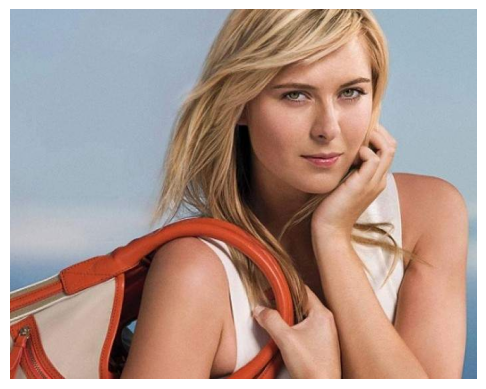

In [55]:
#plot the image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img) #help to show  color image.
plt.axis('off')
plt.show()

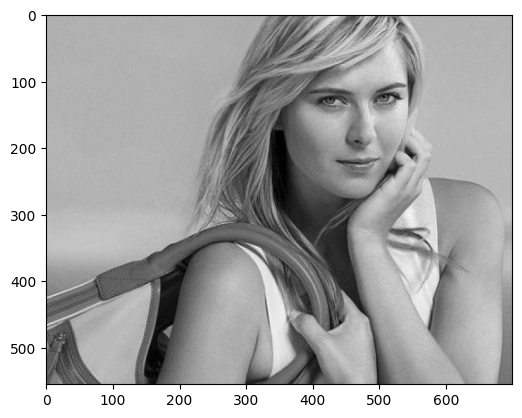

In [52]:
#plot the image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray') #help to show grey image.
plt.show()

In [61]:
face_cascasde = cv2.CascadeClassifier('OpenCV\haarcascades\haarcascade_frontalface_default.xml') #Helps to detect front face
eye_cascade = cv2.CascadeClassifier('OpenCV\haarcascades\haarcascade_eye.xml') #helps to detect teh eye

faces = face_cascasde.detectMultiScale(gray, 1.3, 5)

print(f"x - {faces[0][0]}\ny - {faces[0][1]}\nWidth - {faces[0][2]}\nHeight - {faces[0][3]}")

x - 348
y - 35
Width - 243
Height - 243


In [45]:
(x, y, w, h) = faces[0] # storing the values in their respective variables.

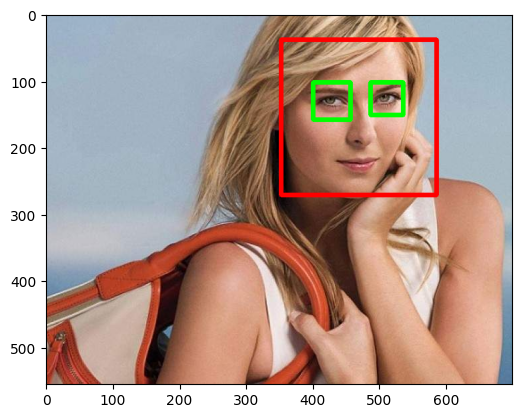

In [78]:
face_img = cv2.rectangle(img, (x, y), (w+x, h+y), color=(255, 0, 0), thickness=5) #Helps to capture te face of image
plt.imshow(face_img)
plt.show()

In [68]:
eye = eye_cascade.detectMultiScale(gray, 1.3, 5)

print(f"x - {eye[0][0]}\ny - {eye[0][1]}\nWidth - {eye[0][2]}\nHeight - {eye[0][3]}\n") #first eye coordinates
print(f"x - {eye[1][0]}\ny - {eye[1][1]}\nWidth - {eye[1][2]}\nHeight - {eye[1][3]}") #second eye coordinates


x - 486
y - 102
Width - 49
Height - 49

x - 400
y - 102
Width - 56
Height - 56


In [69]:
(x1, y1, w1, h1) = eye[0] #storing the first eye coordinates
(x2, y2, w2, h2) = eye[1] #storing the second eye coordinates

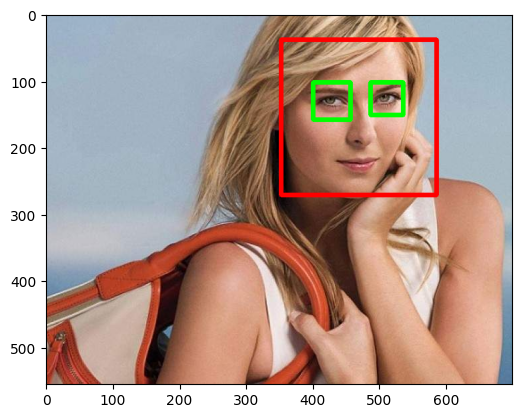

In [74]:
cv2.rectangle(img, (x1,y1), (w1+x1, h1+y1), color=(0, 255, 0), thickness=5) #Helps to capture the first eye of image
cv2.rectangle(img, (x2,y2), (w2+x2, h2+y2), color=(0, 255, 0), thickness=5) #Helps to capture the second eye of image
plt.imshow(img)
plt.show()

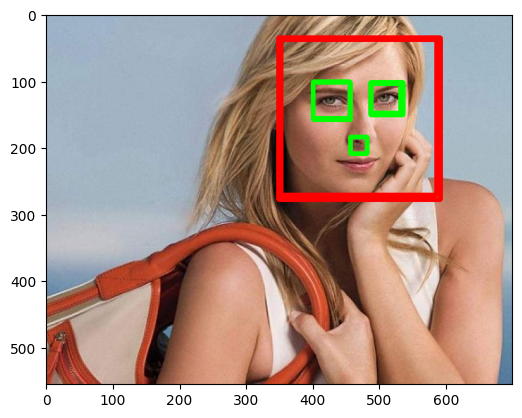

In [ ]:
for (x, y, w, h) in faces:

    face_img  = cv2.rectangle(img, (x, y), (x+w, y+h), color=(255, 0, 0), thickness=5)
    roi_img = img[y: y+h, x: x+w] #region of intrest
    roi_color = face_img[y: y+h, x: x+w]
    eye = eye_cascade.detectMultiScale(gray)

    for (ex, ey, ew, eh) in eye:
        face_img  = cv2.rectangle(img, (ex, ey), (ex+ew, ey+eh), color=(0, 255, 0), thickness=5)

plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

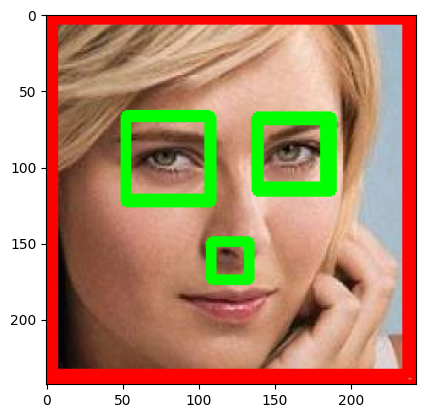

In [82]:
plt.imshow(roi_color, cmap='gray') #This code gives you a crop face
plt.show()

`Detecting face image using a function`

In [93]:
def get_crop_image(image_path):

    img  = cv2.imread(image_path) # read the image

    if img is None:
        raise ValueError("Image not found invalid path")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascasde.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:

        roi_gray = gray[y : y+h, x : x+w]
        roi_color = img[y : y+h, x : x+w]

        eyes = eye_cascade.detectMultiScale(roi_gray)

        if len(eyes)>=2:
            return roi_color
        
    else:
        return None

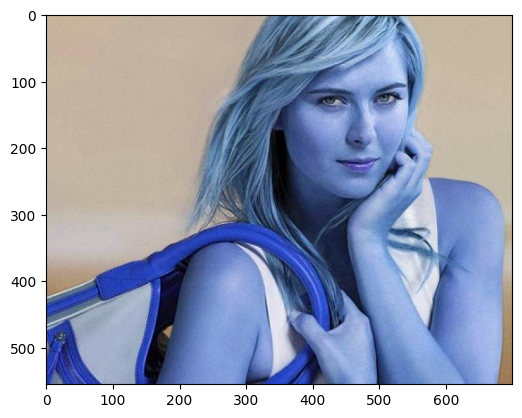

In [94]:
original_image = cv2.imread('Test images\sharapova1.jpg')
plt.imshow(original_image, cmap='gray')
plt.show()

## **Image with clearly `visible eyes`**

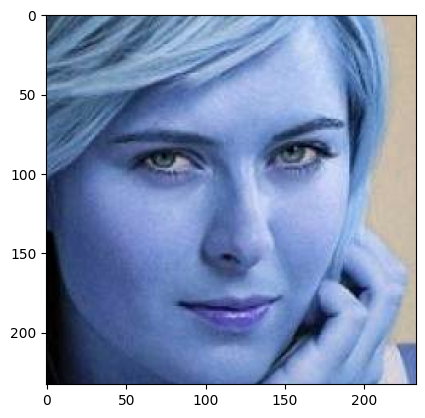

In [96]:
croped_image = get_crop_image('Test images\sharapova1.jpg')
plt.imshow(croped_image)
plt.show()

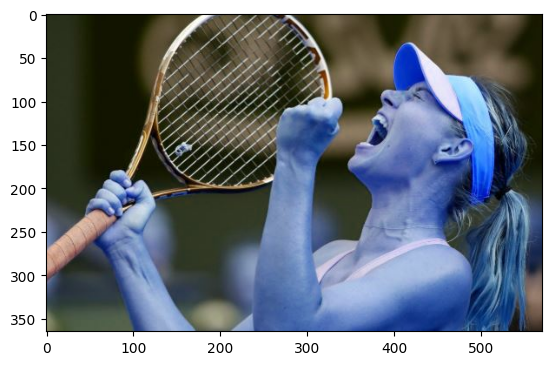

In [97]:
org_img_obstructed  = cv2.imread('Test images\sharapova2 (1).jpg')
plt.imshow(org_img_obstructed)
plt.show()

## **Image with not clearly `visible eyes`**

In [ ]:
croped_image_2 = get_crop_image('Test images\sharapova2 (1).jpg')
croped_image_2

In [105]:
path_to_data = './datasets/'
path_to_cr_data = './datasets/cropped/'

In [106]:
import os

img_dir = []

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dir.append(entry.path)
img_dir

['./datasets/john cena images',
 './datasets/messi images',
 './datasets/neymar images',
 './datasets/ronaldo images',
 './datasets/virat kholi images']

In [ ]:
import shutil
# Deletes the old 'cropped_faces' folder (if exists) and creates a new one
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)